# Visualizing the Fair Haven Harbor and New Bedford Point Deployment

Please note that Fairhaven (fh) will be used to refer to the harbor, and New Bedford (nb) will be used to refer to the point.

In [43]:
# necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.image import NonUniformImage
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import seaborn as sns
from IPython.display import display
from descartes import PolygonPatch
from shapely.geometry import LineString
import shapefile
from scipy.optimize import curve_fit
import sensor_plotting as sp
import GPy as GPy
from scipy.interpolate import griddata, Rbf
import scipy.optimize
from scipy.integrate import quad
from matplotlib.path import Path
from matplotlib.patches import PathPatch

%matplotlib inline
%pylab inline

pd.set_option('display.max_columns',None)
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['axes.labelsize'] = 28
plt.rcParams['axes.titlesize'] = 32
plt.rcParams['figure.figsize'] = (10,7)

Populating the interactive namespace from numpy and matplotlib


 /home/vpreston/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning:pylab import has clobbered these variables: ['griddata', 'title']
`%matplotlib` prevents importing * from pylab and numpy


In [17]:
all_data = 'data/clean/all_interpolated.csv'
fh_data = 'data/clean/fh_interpolated.csv'
nb_data = 'data/clean/nb_interpolated.csv'

ctd_geo = 'data/clean/ctd_geo.csv'
gga_geo = 'data/clean/gga_geo.csv'
nit_geo = 'data/clean/nit_geo.csv'
op_geo = 'data/clean/op_geo.csv'
air_geo = 'data/clean/air_geo.csv'

In [18]:
all_df = pd.read_table(all_data, delimiter=',', header=[0,1])
fh_df = pd.read_table(fh_data, delimiter=',', header=[0,1])
nb_df = pd.read_table(nb_data, delimiter=',', header=[0,1])

ctd_df = pd.read_table(ctd_geo, delimiter=',', header=[0,1])
gga_df = pd.read_table(gga_geo, delimiter=',', header=[0,1])
nit_df = pd.read_table(nit_geo, delimiter=',', header=[0,1])
air_df = pd.read_table(air_geo, delimiter=',', header=[0,1])
op_df = pd.read_table(op_geo, delimiter=',', header=[0,1])

## Visualizing [Lat,Lon,Dep,Prop]
For quantities of interest (temperature, salinity, methane, CO2, O2, and nitrate), these plots are 3D representations of the lat, lon, and depth of the measurement. The two sites are shown seperately, for clarity.

In [44]:
def viz_3d(x, y, z, c, label, title, vmin=None, vmax=None):
    if vmin==None:
        vmin = min(c)
    if vmax==None:
        vmax = max(c)
    
    m = plt.figure(figsize=(10,7))
    ax = m.add_subplot(111, projection='3d')
    cmap = plt.cm.viridis
    points = ax.scatter(x,y,z, c=c, s=5, alpha=0.5, lw=0, cmap=cmap, vmin=vmin, vmax=vmax)
    cbar = m.colorbar(points)
    cbar.set_label(label)
    m.suptitle(title, fontsize=18)
    ax.set_xlabel('Latitude', fontsize=18)
    ax.set_ylabel('Longitude', fontsize=18)
    ax.set_zlabel('Depth', fontsize=18)

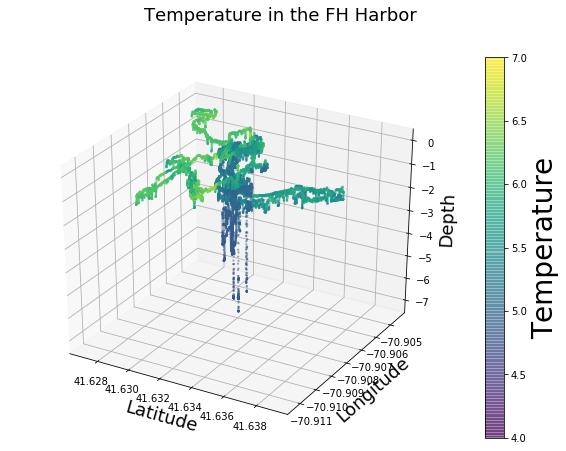

In [45]:
x = fh_df['p']['Latitude']
y = fh_df['p']['Longitude']
z = -fh_df['ctd']['Depth']
c = fh_df['ctd']['Temperature']
label = 'Temperature'
title = 'Temperature in the FH Harbor'

viz_3d(x, y, z, c, label, title, 4, 7)
plt.show()

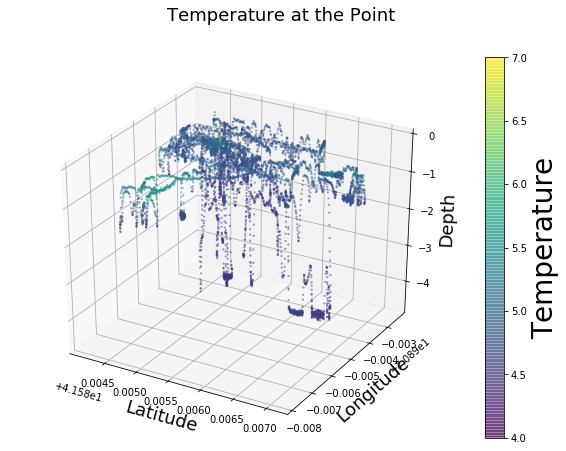

In [46]:
x = nb_df['p']['Latitude']
y = nb_df['p']['Longitude']
z = -nb_df['ctd']['Depth']
c = nb_df['ctd']['Temperature']
label = 'Temperature'
title = 'Temperature at the Point'

viz_3d(x, y, z, c, label, title, 4, 7)
plt.show()

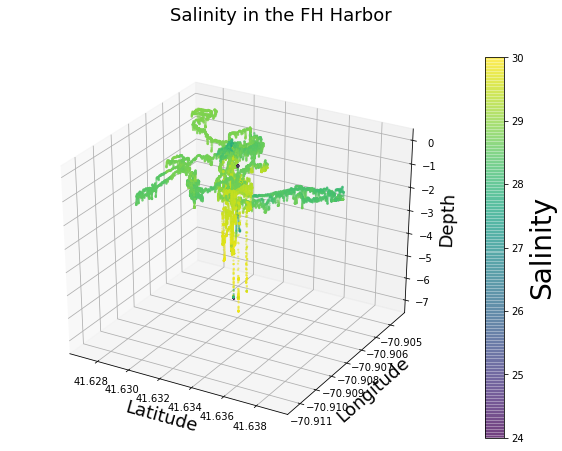

In [47]:
x = fh_df['p']['Latitude']
y = fh_df['p']['Longitude']
z = -fh_df['ctd']['Depth']
c = fh_df['ctd']['Salinity']
label = 'Salinity'
title = 'Salinity in the FH Harbor'

viz_3d(x, y, z, c, label, title, 24, 30)
plt.show()

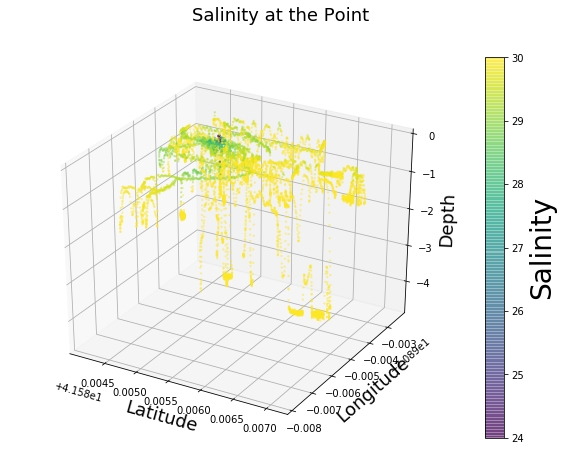

In [48]:
x = nb_df['p']['Latitude']
y = nb_df['p']['Longitude']
z = -nb_df['ctd']['Depth']
c = nb_df['ctd']['Salinity']
label = 'Salinity'
title = 'Salinity at the Point'

viz_3d(x, y, z, c, label, title, 24, 30)
plt.show()

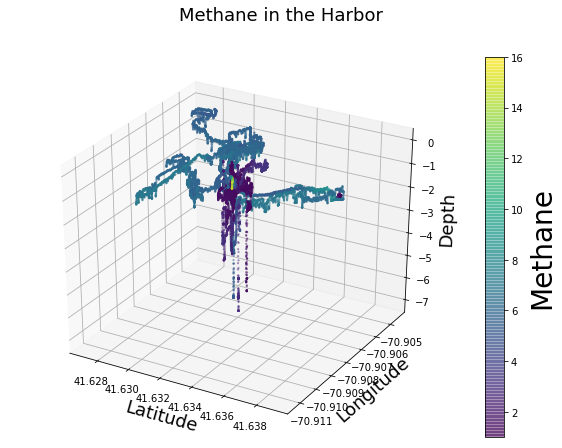

In [49]:
x = fh_df['p']['Latitude']
y = fh_df['p']['Longitude']
z = -fh_df['ctd']['Depth']
c = fh_df['gga']['CH4_ppm_adjusted']
label = 'Methane'
title = 'Methane in the Harbor'

viz_3d(x, y, z, c, label, title, 1, 16)
plt.show()

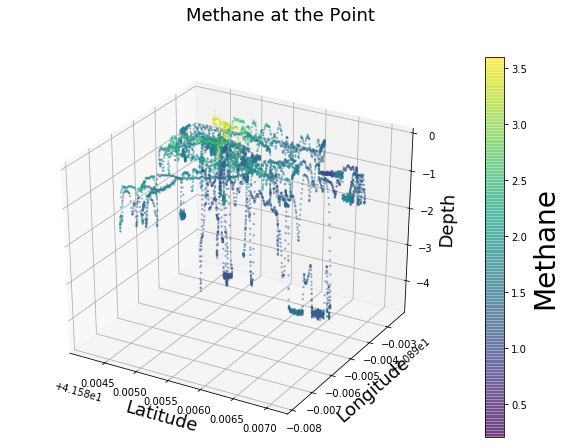

In [50]:
x = nb_df['p']['Latitude']
y = nb_df['p']['Longitude']
z = -nb_df['ctd']['Depth']
c = nb_df['gga']['CH4_ppm_adjusted']
label = 'Methane'
title = 'Methane at the Point'

viz_3d(x, y, z, c, label, title, 0.2, 3.6)
plt.show()

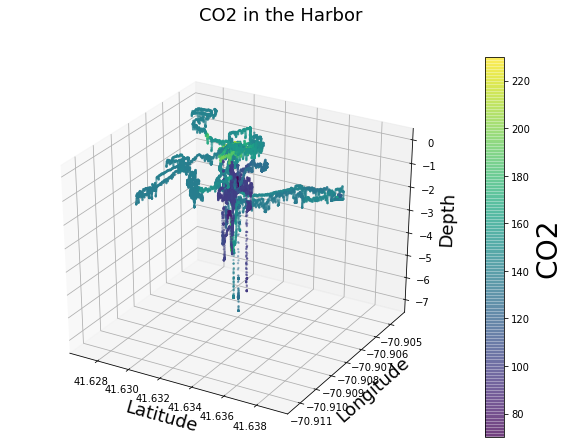

In [51]:
x = fh_df['p']['Latitude']
y = fh_df['p']['Longitude']
z = -fh_df['ctd']['Depth']
c = fh_df['gga']['CO2_ppm_adjusted']
label = 'CO2'
title = 'CO2 in the Harbor'

viz_3d(x, y, z, c, label, title, 70, 230)
plt.show()

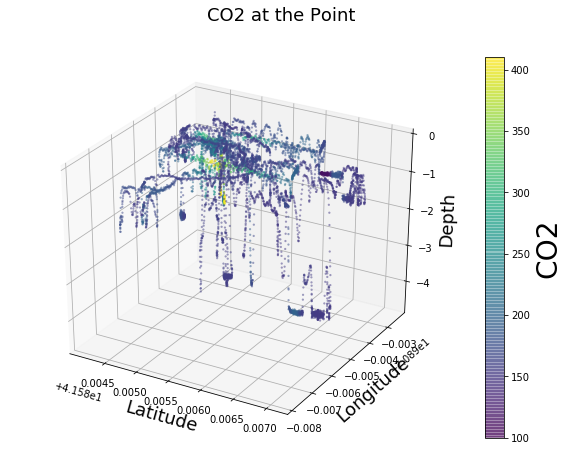

In [52]:
x = nb_df['p']['Latitude']
y = nb_df['p']['Longitude']
z = -nb_df['ctd']['Depth']
c = nb_df['gga']['CO2_ppm_adjusted']
label = 'CO2'
title = 'CO2 at the Point'

viz_3d(x, y, z, c, label, title, 100, 410)
plt.show()

## Cross Sections: Long, Lat v Depth
Now, we'll take a look at the cross sections. We will do a similar analysis of the two sites seperately.

In [183]:
def viz_cross(x1, x2, y, c, label, title, vmin=None, vmax=None):
    if vmin==None:
        vmin = min(c)
    if vmax==None:
        vmax = max(c)
    
    fig, ax = plt.subplots(1,2)
    
    cmap = plt.cm.viridis
    plt.suptitle(title, fontsize=18)
    
    points = ax[0].scatter(x1,y, c=c, s=10, alpha=0.5, lw=0, cmap=cmap, vmin=vmin, vmax=vmax)
    ax[0].set_ylabel('Depth', fontsize=18)
    ax[0].set_xlabel('Longitude', fontsize=18)
    
    points = ax[1].scatter(x2,y, c=c, s=10, alpha=0.5, lw=0, cmap=cmap, vmin=vmin, vmax=vmax)
    ax[1].set_xlabel('Latitude', fontsize=18)
    
    cbar = fig.colorbar(points)
    cbar.set_label(label)

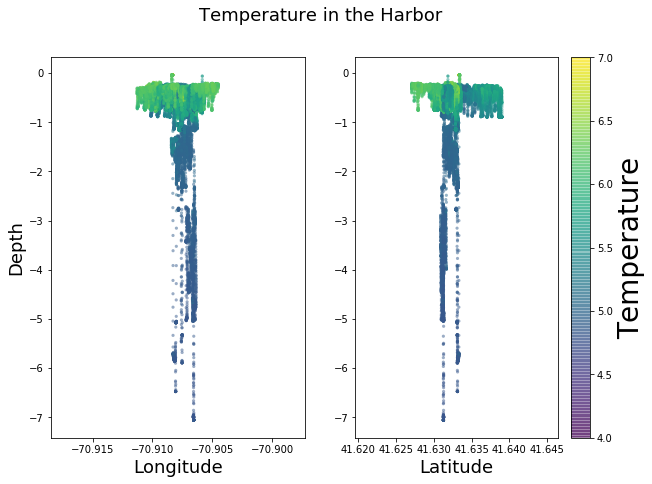

In [184]:
x1 = fh_df['p']['Longitude']
x2 = fh_df['p']['Latitude']
y = -fh_df['ctd']['Depth']
c = fh_df['ctd']['Temperature']
label = 'Temperature'
title = 'Temperature in the Harbor'

viz_cross(x1, x2, y, c, label, title, 4, 7)
plt.show()

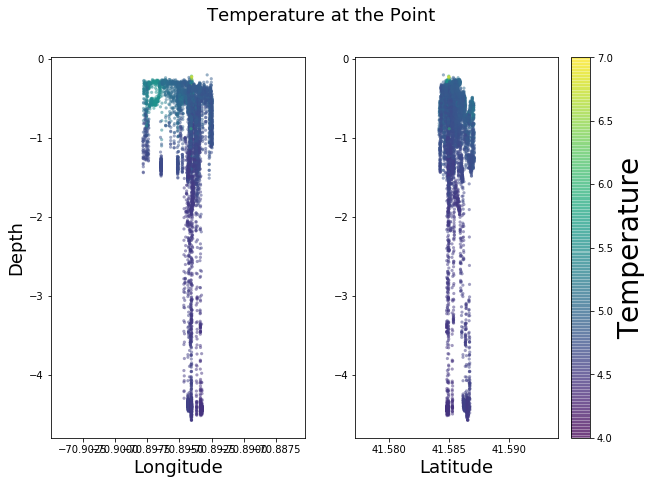

In [185]:
x1 = nb_df['p']['Longitude']
x2 = nb_df['p']['Latitude']
y = -nb_df['ctd']['Depth']
c = nb_df['ctd']['Temperature']
label = 'Temperature'
title = 'Temperature at the Point'

viz_cross(x1, x2, y, c, label, title, 4, 7)
plt.show()

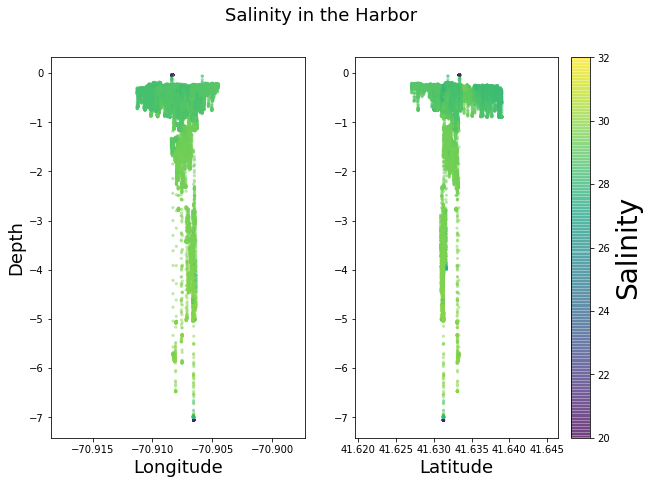

In [201]:
x1 = fh_df['p']['Longitude']
x2 = fh_df['p']['Latitude']
y = -fh_df['ctd']['Depth']
c = fh_df['ctd']['Salinity']
label = 'Salinity'
title = 'Salinity in the Harbor'

viz_cross(x1, x2, y, c, label, title, 20, 32)
plt.show()

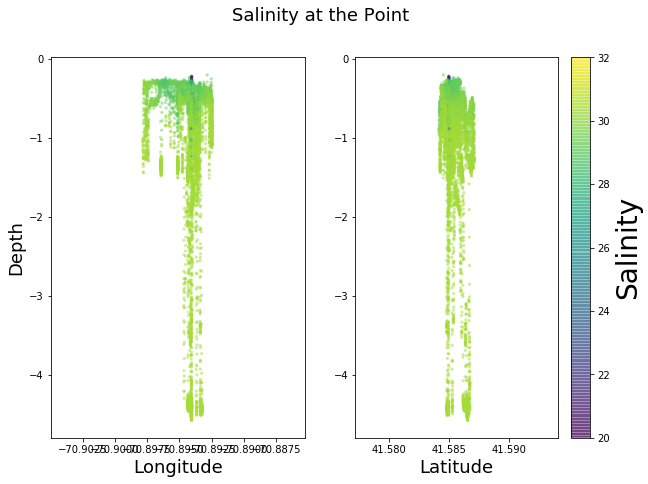

In [202]:
x1 = nb_df['p']['Longitude']
x2 = nb_df['p']['Latitude']
y = -nb_df['ctd']['Depth']
c = nb_df['ctd']['Salinity']
label = 'Salinity'
title = 'Salinity at the Point'

viz_cross(x1, x2, y, c, label, title, 20, 32)
plt.show()

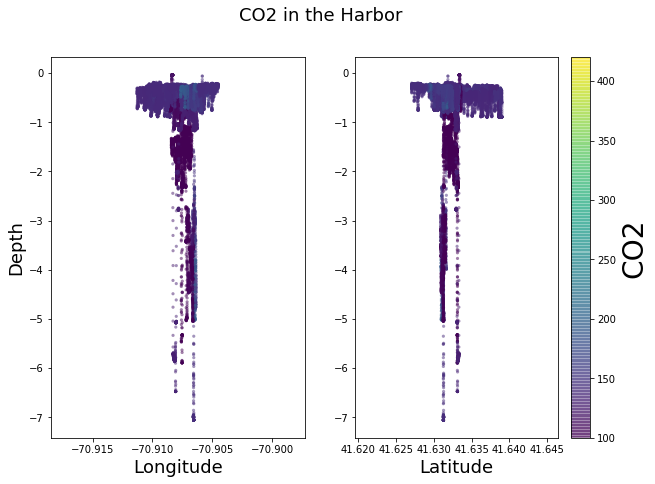

In [190]:
x1 = fh_df['p']['Longitude']
x2 = fh_df['p']['Latitude']
y = -fh_df['ctd']['Depth']
c = fh_df['gga']['CO2_ppm_adjusted']
label = 'CO2'
title = 'CO2 in the Harbor'

viz_cross(x1, x2, y, c, label, title, 100, 420)
plt.show()

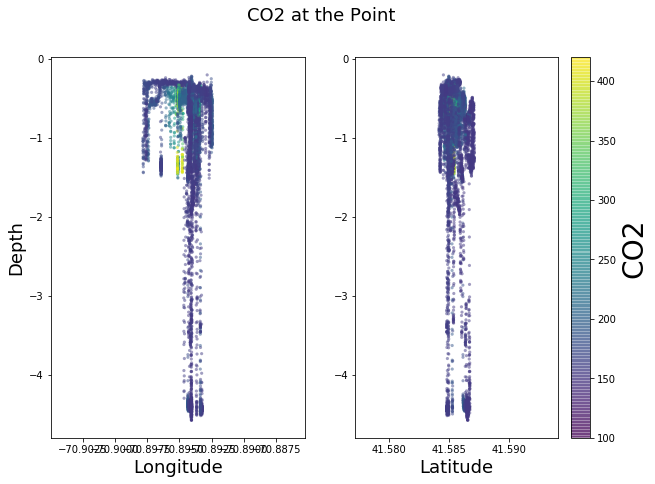

In [191]:
x1 = nb_df['p']['Longitude']
x2 = nb_df['p']['Latitude']
y = -nb_df['ctd']['Depth']
c = nb_df['gga']['CO2_ppm_adjusted']
label = 'CO2'
title = 'CO2 at the Point'

viz_cross(x1, x2, y, c, label, title, 100, 420)
plt.show()

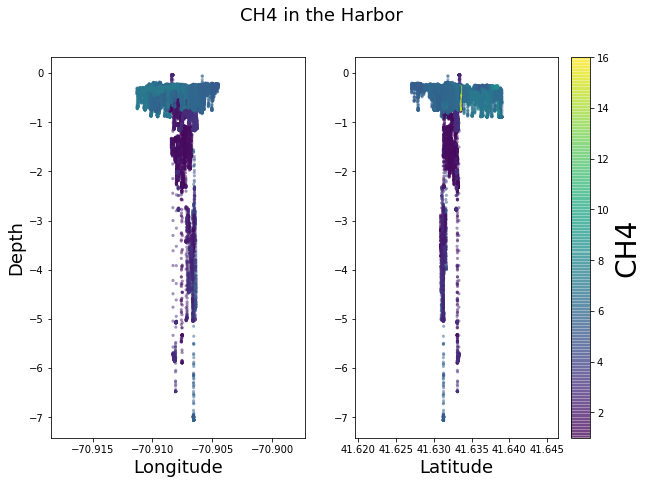

In [192]:
x1 = fh_df['p']['Longitude']
x2 = fh_df['p']['Latitude']
y = -fh_df['ctd']['Depth']
c = fh_df['gga']['CH4_ppm_adjusted']
label = 'CH4'
title = 'CH4 in the Harbor'

viz_cross(x1, x2, y, c, label, title, 1, 16)
plt.show()

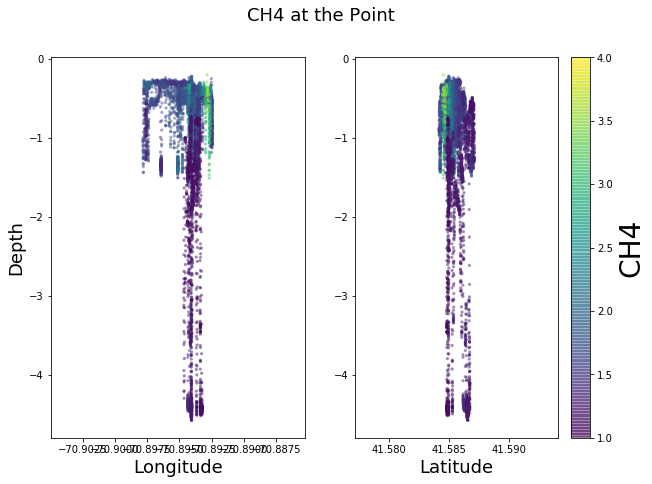

In [194]:
x1 = nb_df['p']['Longitude']
x2 = nb_df['p']['Latitude']
y = -nb_df['ctd']['Depth']
c = nb_df['gga']['CH4_ppm_adjusted']
label = 'CH4'
title = 'CH4 at the Point'

viz_cross(x1, x2, y, c, label, title, 1, 4)
plt.show()

## Aerial View Cross-Sections
Now, cross sections as though we were looking above. No interpolation. Location of plume is marked. Different layers (marked by half meters) are also plotted.

In [ ]:
# TODO

## Gaussian Process Estimations
To interpolate the data, we can use a Gaussian Process. Location of the plume upwelling site is marked with a red star.

(1458, 2) (1458, 1)
Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    03s39  0013   8.515663e+02   2.230332e+03 
    05s80  0025   8.442638e+02   5.483267e-08 
Runtime:     05s80
Optimization status: Converged

Optimization restart 1/2, f = 844.263849628
Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    01s00  0005   1.302279e+03   7.278191e+02 
    03s53  0017   3.419547e+03   3.378295e+06 
    04s68  0023   9.992336e+02   1.426130e+05 
    08s28  0041   8.442638e+02   3.857061e-08 
Runtime:     08s28
Optimization status: Converged

Optimization restart 2/2, f = 844.263849628
  rbf.         |                  value  |  constraints  |  priors
  variance     |     13.183940427977332  |      +ve      |        
  lengthscale  |  0.0004105076384311114  |      +ve      |        


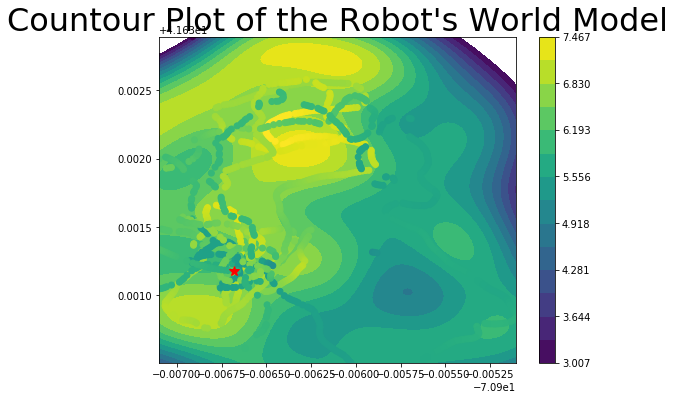

In [159]:
fh_d = fh_df.loc[fh_df['p'].drop_duplicates(subset=['Longitude']).dropna().index]
fh_d = fh_d.loc[fh_d['gga'].dropna(subset=['CO2_ppm_adjusted']).index]
fh_d = fh_d[fh_d['p']['Latitude'] < 41.634]
fh_d = fh_d[fh_d['p']['Latitude'] > 41.6305]
fh_d = fh_d[fh_d['p']['Longitude'] > -70.9071]
fh_d = fh_d[fh_d['ctd']['Depth'] > 0.2]
fh_d = fh_d[fh_d['ctd']['Depth'] < 0.5]
fh_d = fh_d[fh_d['gga']['CH4_ppm_adjusted'] < 8.5]


# ctd_fh = ctd_df.drop(ctd_df[ctd_df.Julian_Date > (0.205+2458207)].index)
# ctd_nb = ctd_df.drop(ctd_df[ctd_df.Julian_Date < (0.231+2458207)].index)
# fh_d = fh_d.dropna()

xv = fh_d['p']['Longitude'][:]
yv = fh_d['p']['Latitude'][:]
z = fh_d['gga']['CH4_ppm_adjusted'][:]

# plt.scatter(xv*100, yv*100)

ranges = [min(xv), max(xv), min(yv), max(yv)]

points = []
for x,y in zip(xv, yv):
    points.append([x,y])

xvals = np.array(points)
zvals = np.reshape(np.array(z), (len(z), 1))
print xvals.shape, zvals.shape

kern = GPy.kern.RBF(input_dim = 2, lengthscale=0.001, variance=np.var(z))
mod = GPy.models.GPRegression(xvals, zvals, kern)
mod.initialize_parameter()
mod.optimize_restarts(num_restarts = 2, messages = True)
print kern

xc = np.linspace(ranges[0], ranges[1], 100)
yc = np.linspace(ranges[2], ranges[3], 100)
xc, yc = np.meshgrid(xc, yc, sparse = False, indexing= 'xy')
data = np.vstack([xc.ravel(), yc.ravel()]).T
obs, var = mod.predict(data, full_cov=False, include_likelihood=True)

fig2, ax2 = plt.subplots(figsize=(8, 6))
ax2.set_xlim(ranges[0:2])
ax2.set_ylim(ranges[2:])       
ax2.set_title('Countour Plot of the Robot\'s World Model')     
plot = ax2.contourf(xc, yc, obs.reshape(xc.shape), cmap = 'viridis', levels=np.linspace(min(z), max(z), 15), vmin=min(z), vmax=max(z))
# ax2.scatter(xc, yc, c=obs.reshape(xc.shape), cmap = 'viridis', levels=np.linspace(min(z), max(z), 15), vmin=min(z), vmax=max(z))
ax2.scatter(xv, yv, c=z, cmap='viridis', vmin=min(z), vmax=max(z))
ax2.plot(-70.90668, 41.63118, 'r*', markersize=10)
cbar = fig2.colorbar(plot)

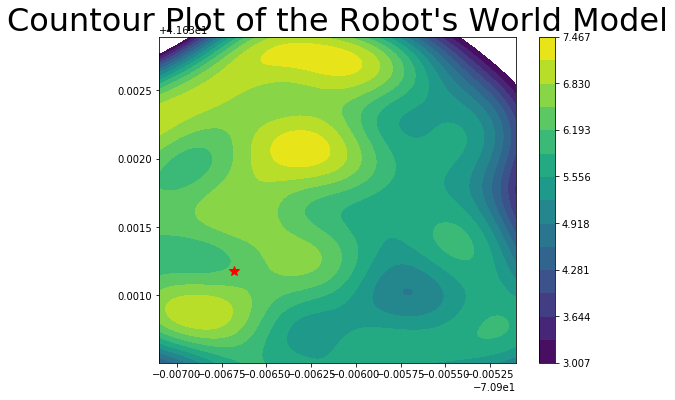

In [160]:
fig2, ax2 = plt.subplots(figsize=(8, 6))
ax2.set_xlim(ranges[0:2])
ax2.set_ylim(ranges[2:])       
ax2.set_title('Countour Plot of the Robot\'s World Model')     
plot = ax2.contourf(xc, yc, obs.reshape(xc.shape), cmap = 'viridis', levels=np.linspace(min(z), max(z), 15), vmin=min(z), vmax=max(z))
# ax2.scatter(xc, yc, c=obs.reshape(xc.shape), cmap = 'viridis', levels=np.linspace(min(z), max(z), 15), vmin=min(z), vmax=max(z))
# ax2.scatter(xv, yv, c=z, cmap='viridis', vmin=min(z), vmax=max(z))
ax2.plot(-70.90668, 41.63118, 'r*', markersize=10)
cbar = fig2.colorbar(plot)

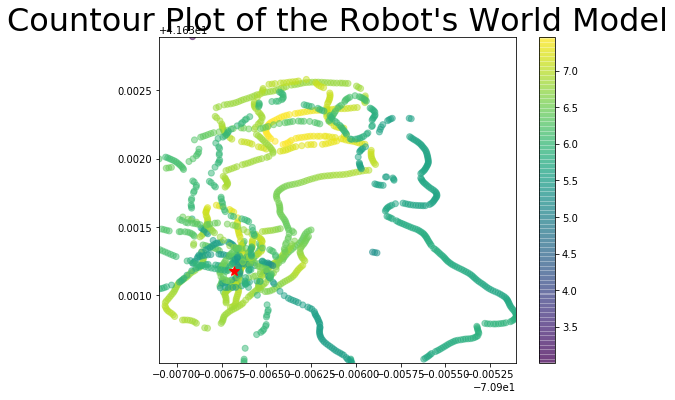

In [161]:
fig2, ax2 = plt.subplots(figsize=(8, 6))
ax2.set_xlim(ranges[0:2])
ax2.set_ylim(ranges[2:])       
ax2.set_title('Countour Plot of the Robot\'s World Model')     
# plot = ax2.contourf(xc, yc, obs.reshape(xc.shape), cmap = 'viridis', levels=np.linspace(min(z), max(z), 15), vmin=min(z), vmax=max(z))
# ax2.scatter(xc, yc, c=obs.reshape(xc.shape), cmap = 'viridis', levels=np.linspace(min(z), max(z), 15), vmin=min(z), vmax=max(z))
scat = ax2.scatter(xv, yv, c=z, cmap='viridis', vmin=min(z), vmax=max(z), alpha=0.5)
ax2.plot(-70.90668, 41.63118, 'r*', markersize=10)
cbar = fig2.colorbar(scat)